In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [5]:
# Step 1: Data Acquisition
# Load the dataset
CauseofDeath_data = pd.read_csv('/content/Cause of Death_Training Part.csv')
CauseofDeath_data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,Target
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [6]:
print(CauseofDeath_data.columns)

Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11',
       'Target'],
      dtype='object')


In [7]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load your data into CauseofDeath_data DataFrame

# Create new columns 'Is_Male' and 'Is_Female'
CauseofDeath_data['Is_Male'] = (CauseofDeath_data['X2'] == 'Male').astype(int)
CauseofDeath_data['Is_Female'] = (CauseofDeath_data['X2'] == 'Female').astype(int)
CauseofDeath_data.drop(columns=['X2'], inplace=True)

In [8]:
# Identify numeric columns
numeric_columns = CauseofDeath_data.select_dtypes(include=['int64', 'float64']).columns

# One-hot encode categorical variables
CauseofDeath_data = pd.get_dummies(CauseofDeath_data)

# Standardize only numeric features
scaler = StandardScaler()
CauseofDeath_data[numeric_columns] = scaler.fit_transform(CauseofDeath_data[numeric_columns])

# Now you can proceed with the rest of your code
# For example:
# X_train = CauseofDeath_data.drop(columns=['target_column'])
# y_train = CauseofDeath_data['target_column']
# Continue with your machine learning model building process

In [9]:
# Step 2: Data Preprocessing
# Separate features and target variable
X = CauseofDeath_data.drop('Target', axis=1)  # Features
y = CauseofDeath_data['Target']  # Target

In [10]:
# Encode categorical target labels to numerical values
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [11]:
# Detect and handle outliers using IQR method for each numeric column
def remove_outliers_iqr(data, threshold=1.5):
    for column in data.select_dtypes(include=['number']).columns:
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR
        data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    return data

# Example: Remove outliers from numeric columns
CauseofDeath_data = remove_outliers_iqr(CauseofDeath_data)

In [12]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [14]:
# After standardizing the features (X_train_scaled and X_test_scaled), add the following code:

from sklearn.preprocessing import RobustScaler

# Initialize the RobustScaler
robust_scaler = RobustScaler()

# Fit and transform the training data
X_train_robust_scaled = robust_scaler.fit_transform(X_train)

# Transform the testing data using the same scaler
X_test_robust_scaled = robust_scaler.transform(X_test)

In [15]:
# Step 3: Model Selection
# Train the Support Vector Machine (SVM) model
svm_model = SVC(kernel='linear', random_state=42)  # Linear kernel

In [16]:
from sklearn.impute import SimpleImputer
# # Impute missing values
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)

# Step 4: Model Training
svm_model = SVC()
svm_model.fit(X_train_imputed, y_train)

SVC()

In [17]:
from sklearn.impute import SimpleImputer

# Impute missing values in the testing data using mean imputation
imputer = SimpleImputer(strategy='mean')
X_test_imputed = imputer.fit_transform(X_test)

# Step 5: Model Evaluation
# Make predictions on the imputed testing set
y_pred = svm_model.predict(X_test_imputed)

In [18]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9225


In [19]:
confusion_matrix(y_test, y_pred)

array([[738,   0],
       [ 62,   0]])

In [20]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96       738
           1       0.00      0.00      0.00        62

    accuracy                           0.92       800
   macro avg       0.46      0.50      0.48       800
weighted avg       0.85      0.92      0.89       800



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [21]:
from sklearn.impute import SimpleImputer

# Impute missing values in the training data using mean imputation
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)

In [22]:
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Assuming you have already defined X_train, X_test, y_train, and y_test

# Step 3: Data Preprocessing
# Impute missing values in the training data using mean imputation
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
# Impute missing values in the testing data using the same imputer
X_test_imputed = imputer.transform(X_test)

# Step 4: Model Training
# Train the KNeighborsClassifier model with the imputed training data
knn = KNeighborsClassifier()
knn.fit(X_train_imputed, y_train)

# Step 5: Model Evaluation
# Make predictions on the testing set
y_pred = knn.predict(X_test_imputed)

# Evaluate the model
train_accuracy = accuracy_score(y_train, knn.predict(X_train_imputed))
test_accuracy = accuracy_score(y_test, y_pred)
print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

Train Accuracy: 0.9446702094404501
Test Accuracy: 0.92125
Confusion Matrix:
[[736   2]
 [ 61   1]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96       738
           1       0.33      0.02      0.03        62

    accuracy                           0.92       800
   macro avg       0.63      0.51      0.49       800
weighted avg       0.88      0.92      0.89       800



In [23]:
# Decision Tree
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Step 3: Data Preprocessing
# Impute missing values in the training data using mean imputation
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
# Impute missing values in the testing data using the same imputer
X_test_imputed = imputer.transform(X_test)

# Step 4: Model Training
# Train the DecisionTreeClassifier model with the imputed training data
DT = DecisionTreeClassifier()
DT.fit(X_train_imputed, y_train)

# Step 5: Model Evaluation
# Make predictions on the testing set
y_pred = DT.predict(X_test_imputed)

# Evaluate the model
train_accuracy = accuracy_score(y_train, DT.predict(X_train_imputed))
test_accuracy = accuracy_score(y_test, y_pred)
print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

Train Accuracy: 1.0
Test Accuracy: 0.8925
Confusion Matrix:
[[699  39]
 [ 47  15]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.95      0.94       738
           1       0.28      0.24      0.26        62

    accuracy                           0.89       800
   macro avg       0.61      0.59      0.60       800
weighted avg       0.89      0.89      0.89       800



In [25]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Define grid search parameters
grid_param = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 7, 10],
    'splitter': ['best', 'random'],
    'min_samples_leaf': [1, 2, 3, 5, 7],
    'min_samples_split': [2, 3, 5, 7],  # Adjusted to include valid values
    'max_features': ['auto', 'sqrt', 'log2']
}

# Create grid search
grid_search_dt = GridSearchCV(DecisionTreeClassifier(), grid_param, cv=5, n_jobs=-1, verbose=1)

# Perform grid search
grid_search_dt.fit(X_train_imputed, y_train)
# Get best hyperparameters
best_params = grid_search_dt.best_params_
print("Best Hyperparameters:", best_params)

Fitting 5 folds for each of 960 candidates, totalling 4800 fits
Best Hyperparameters: {'criterion': 'gini', 'max_depth': 3, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 2, 'splitter': 'best'}


In [26]:
grid_search_dt.best_params_

{'criterion': 'gini',
 'max_depth': 3,
 'max_features': 'sqrt',
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'splitter': 'best'}

In [28]:
grid_search_dt.best_score_

0.9431069053208138

In [27]:
from sklearn.impute import SimpleImputer

# Assuming you already have X_test defined
# Impute missing values in the testing data using the same imputer
X_test_imputed = imputer.transform(X_test)

# Assign DT the value of grid_search_dt.best_estimator_
DT = grid_search_dt.best_estimator_

# Impute missing values in the training data using the same imputer
X_train_imputed = imputer.transform(X_train)

# Now you can make predictions using the best estimator
y_pred = DT.predict(X_test_imputed)

print(accuracy_score(y_train, DT.predict(X_train_imputed)))
dt_acc = accuracy_score(y_test, DT.predict(X_test_imputed))
print(accuracy_score(y_test, DT.predict(X_test_imputed)))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.9415442325726789
0.9225
[[738   0]
 [ 62   0]]
              precision    recall  f1-score   support

           0       0.92      1.00      0.96       738
           1       0.00      0.00      0.00        62

    accuracy                           0.92       800
   macro avg       0.46      0.50      0.48       800
weighted avg       0.85      0.92      0.89       800



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [29]:
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier

# Define the RandomForestClassifier with your desired hyperparameters
rand_clf = RandomForestClassifier(criterion='entropy', max_depth=15, max_features=0.75, min_samples_leaf=2, min_samples_split=3, n_estimators=130)

# Initialize SimpleImputer
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on the training data and transform both training and testing data
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Fit the RandomForestClassifier on the imputed training data
rand_clf.fit(X_train_imputed, y_train)

# Make predictions
y_pred = rand_clf.predict(X_test_imputed)

# Assess the performance
print(accuracy_score(y_train, rand_clf.predict(X_train_imputed)))
rand_acc = accuracy_score(y_test, rand_clf.predict(X_test_imputed))
print(accuracy_score(y_test, rand_clf.predict(X_test_imputed)))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.9881212879024696
0.92
[[736   2]
 [ 62   0]]
              precision    recall  f1-score   support

           0       0.92      1.00      0.96       738
           1       0.00      0.00      0.00        62

    accuracy                           0.92       800
   macro avg       0.46      0.50      0.48       800
weighted avg       0.85      0.92      0.88       800



SVM Accuracy: 0.9225
KNN Accuracy: 0.92125
Decision Tree Accuracy: 0.9225
Random Forest Accuracy: 0.92


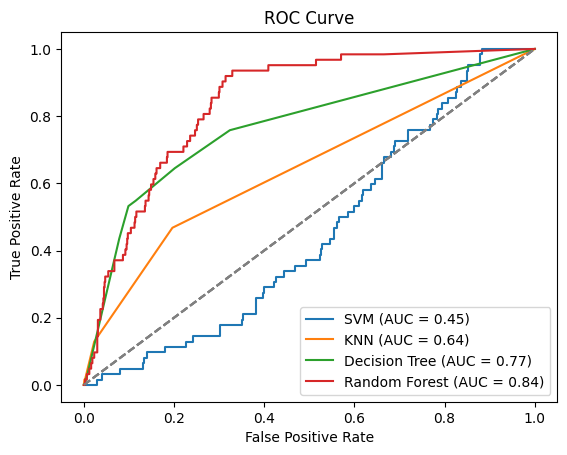

In [30]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
svm_model = SVC(kernel='linear', probability=True, random_state=42)  # Set probability=True

# Fit the SVM model to the training data
svm_model.fit(X_train_imputed, y_train)

# Define a function to plot ROC curve
def plot_roc_curve(model, X_test, y_test, model_name):
    y_score = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()

# Define models
models = {
    'SVM': svm_model,
    'KNN': knn,
    'Decision Tree': DT,
    'Random Forest': rand_clf
}

# Evaluate accuracy and plot ROC curve for each model
for model_name, model in models.items():
    # Calculate accuracy
    accuracy = accuracy_score(y_test, model.predict(X_test_imputed))
    print(f'{model_name} Accuracy:', accuracy)

    # Plot ROC curve
    plot_roc_curve(model, X_test_imputed, y_test, model_name)

plt.show()